# --------------Experiment-12---------------

## 1.Consider MNIST dataset preprocess it and build a simple sequantial Neural Network model on it, test and evaluate the model using different metrics 

<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train ,X_test.shape, y_test.shape

((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8),
 (10000, 28, 28),
 (10000,))

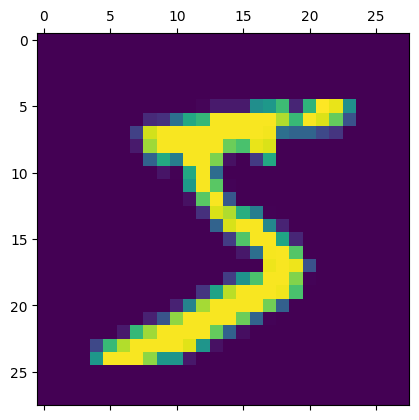

In [4]:
plt.matshow(X_train[0])   # creates the image
plt.show()                # actually displays the image

In [5]:
# X_train = X_train / 255
# X_test = X_test / 255

In [6]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [9]:
from tensorflow import keras

model = keras.Sequential([
    keras.Input(shape=(784,)),          # 👈 Input layer
    keras.layers.Dense(10, activation='softmax')  # 👈 use softmax, not sigmoid
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.8409 - loss: 9.6490 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8785 - loss: 6.1194
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8813 - loss: 5.7564
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8860 - loss: 5.5049
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8863 - loss: 5.5259


In [10]:
# model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train_flattened, y_train, epochs=5)

In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8882 - loss: 5.5892


[5.5892133712768555, 0.8881999850273132]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

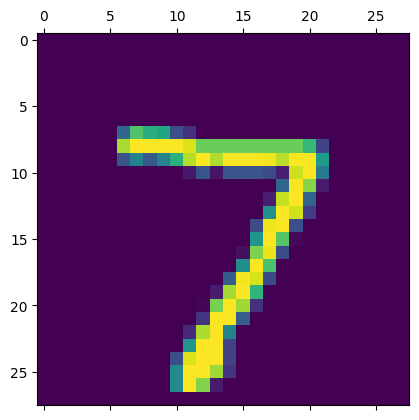

In [13]:
plt.matshow(X_test[0])
plt.show()

**np.argmax finds a maximum element  from an array and returns the index of it**

In [14]:
np.argmax(y_predicted[0])

np.int64(7)

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [16]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 906,    0,    7,    8,    0,   29,   21,    5,    2,    2],
       [   0, 1084,   10,    5,    0,    2,    4,    6,   24,    0],
       [   2,    5,  918,   46,    2,    3,   16,   13,   22,    5],
       [   1,    0,   19,  933,    0,   21,    1,   18,   12,    5],
       [   2,    1,   12,   10,  814,    5,   31,   20,   17,   70],
       [   5,    2,    8,   68,    6,  764,   14,    6,   17,    2],
       [   3,    2,   11,    2,    2,   19,  914,    1,    4,    0],
       [   1,    4,   25,    8,    2,    3,    0,  962,    2,   21],
       [   5,   10,   33,   85,    6,   75,   11,   20,  719,   10],
       [   3,    3,    3,   12,   18,   29,    1,   61,   11,  868]],
      dtype=int32)>

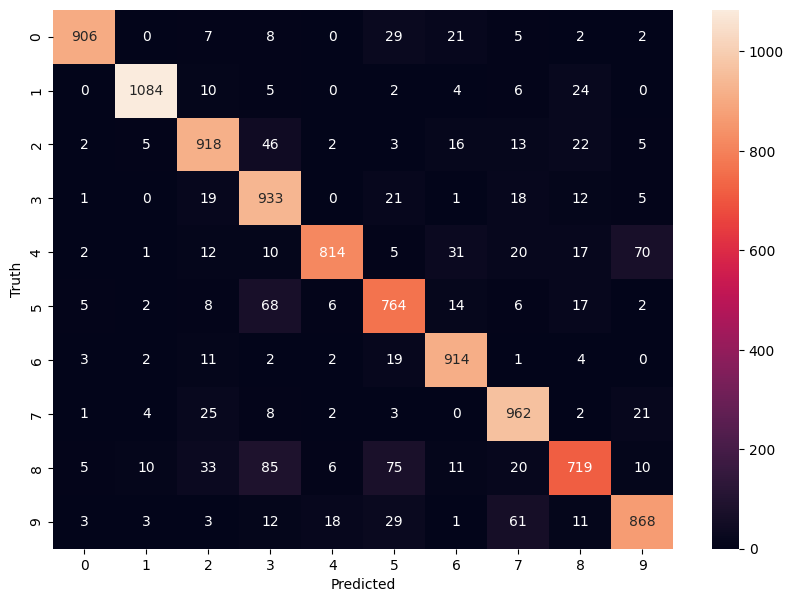

In [18]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h3 style='color:purple'>Using hidden layer</h3>

In [19]:
from tensorflow import keras

model = keras.Sequential([
    keras.Input(shape=(784,)),                # 👈 Define input once
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 👈 use softmax for 10-class
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8396 - loss: 2.2635
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9043 - loss: 0.3841
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9236 - loss: 0.3066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9345 - loss: 0.2540
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9408 - loss: 0.2296


In [20]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train_flattened, y_train, epochs=5)

In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2586


[0.2585771679878235, 0.9355000257492065]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


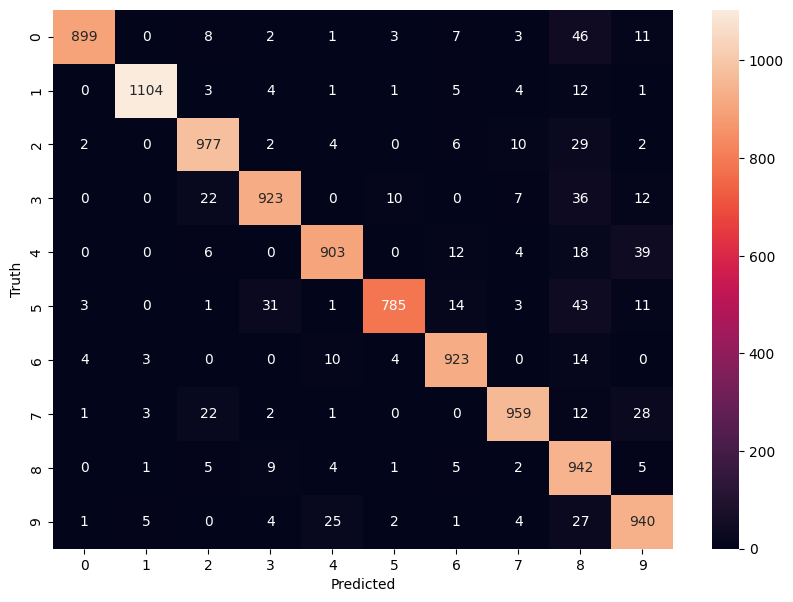

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [23]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),              # 👈 Define input explicitly
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 👈 Better than sigmoid for multi-class
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8411 - loss: 2.4450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9055 - loss: 0.3946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9257 - loss: 0.2952
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9345 - loss: 0.2524
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9409 - loss: 0.2310
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9451 - loss: 0.2165
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9473 - loss: 0.2047
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9496 - loss: 0.2026
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9519 - loss: 0.1950
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9534 - loss: 0.1841


In [24]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 0.2545


[0.2545446455478668, 0.9420999884605408]